In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

goog = pd.read_csv('stocks/GOOGL_2006-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])
goog.head(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
2006-01-10,232.44,235.36,231.25,235.11,9104719,GOOGL
2006-01-11,235.87,237.79,234.82,236.05,9008664,GOOGL
2006-01-12,237.10,237.73,230.98,232.05,10125212,GOOGL
2006-01-13,232.39,233.68,231.04,233.36,7660220,GOOGL


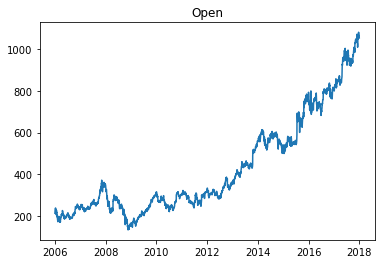

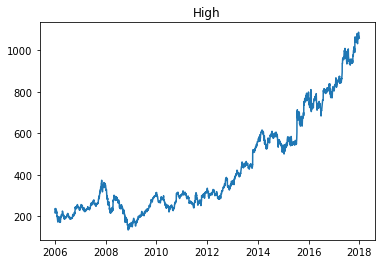

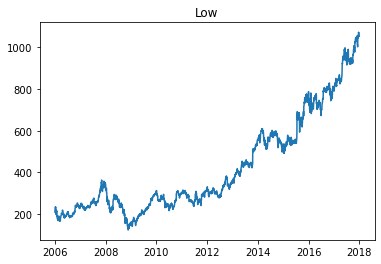

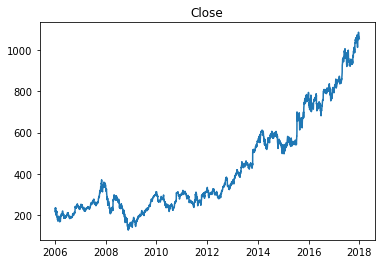

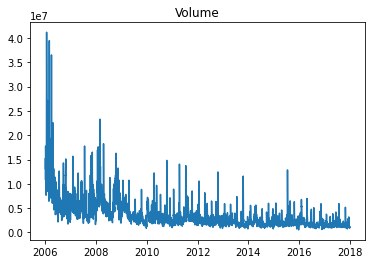

In [22]:
for c in goog.columns:
    if c != 'Date' and c != 'Name':
        plt.title(c)
        plt.plot(goog[c])
        plt.show()

In [23]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

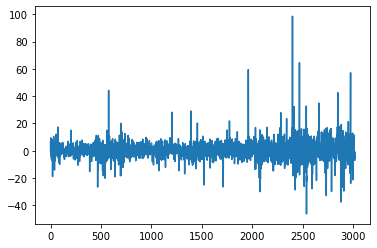

In [46]:
diff = goog['High'].diff()
diff = np.nan_to_num(diff)
plt.plot(diff)
plt.show()

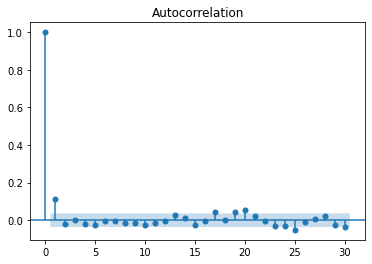

In [47]:
plot_acf(diff,lags=30)
plt.show()

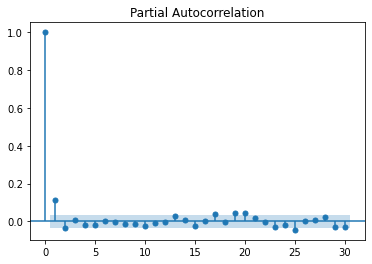

In [48]:
plot_pacf(diff,lags=30)
plt.show()

In [49]:
adf = adfuller(diff)
print("p-value of google: {}".format(float(adf[1])))

p-value of google: 0.0


# Predict High and Low

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3019
Model:                     ARMA(1, 2)   Log Likelihood               -9855.082
Method:                       css-mle   S.D. of innovations              6.331
Date:                Fri, 29 Apr 2022   AIC                          19720.163
Time:                        15:41:26   BIC                          19750.226
Sample:                             0   HQIC                         19730.973
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2781      0.117      2.384      0.017       0.049       0.507
ar.L1.y        0.7926      0.148      5.338      0.000       0.502       1.084
ma.L1.y       -0.6779      0.149     -4.556      0.0

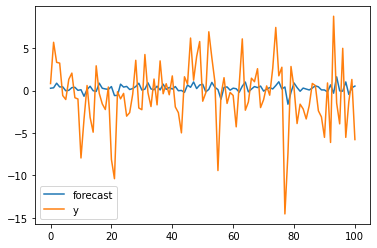

In [53]:
model = ARMA(diff, order=(1,2))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


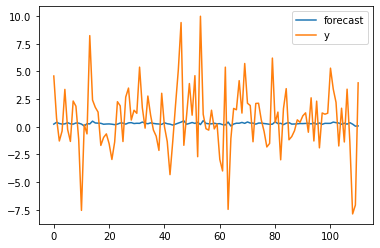

In [57]:
model = ARMA(goog["Close"].diff().iloc[1:].values, order=(1,0))
res = model.fit()
res.plot_predict(start=900, end=1010)
plt.show()

# Predict Volume

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -47724.791
Method:                       css-mle   S.D. of innovations        1783118.347
Date:                Fri, 29 Apr 2022   AIC                          95465.581
Time:                        15:43:09   BIC                          95513.680
Sample:                             0   HQIC                         95482.877
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3961.9325   3462.500     -1.144      0.253   -1.07e+04    2824.442
ar.L1.y       -1.4431      0.021    -67.348      0.000      -1.485      -1.401
ar.L2.y       -0.2973      0.037     -7.948      0.0

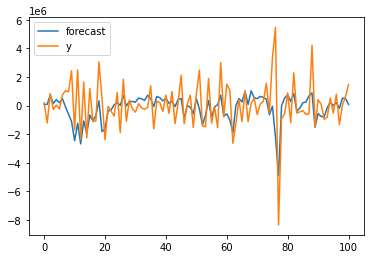

In [55]:
model = ARMA(goog["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -55408.974
Method:                       css-mle   S.D. of innovations       22751607.620
Date:                Fri, 29 Apr 2022   AIC                         110833.948
Time:                        15:42:44   BIC                         110882.047
Sample:                             0   HQIC                        110851.244
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+04   9914.504     -2.047      0.041   -3.97e+04    -865.149
ar.L1.y        0.2053      0.160      1.287      0.198      -0.107       0.518
ar.L2.y        0.7297      0.179      4.080      0.0

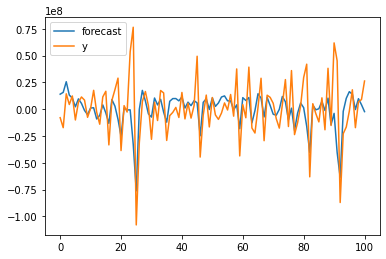

In [54]:
microsoft = pd.read_csv('stocks/MSFT_2006-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])

model = ARMA(microsoft["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

# VAR model

We will assume that the vector $\mathbf{X}_t = (X_{1t},X_{2t},\cdots,X_{mt})$ can be studied as a time series hence the name Vector AutoRegression (VAR).

In [61]:
train_sample = pd.concat([goog["High"].diff().iloc[1:],microsoft["High"].diff().iloc[1:]],axis=1)
train_sample.head()

,High,High
Date,,
2006-01-04,6.65,0.08
2006-01-05,1.30,0.05
2006-01-06,9.49,-0.13
2006-01-09,1.45,0.07
2006-01-10,-1.58,-0.05


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:       ['High', 'High']   No. Observations:                 3018
Model:                     VARMA(1,1)   Log Likelihood              -11806.453
                          + intercept   AIC                          23638.905
Date:                Fri, 29 Apr 2022   BIC                          23717.066
Time:                        15:58:17   HQIC                         23667.011
Sample:                             0                                         
                               - 3018                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.01, 0.99   Jarque-Bera (JB):   116927.68, 24590.76
Prob(Q):                        0.92, 0.32   Prob(JB):                    0.00, 0.00
Heteroskedasticity (H):         3.75, 1.61   Skew:                        1.81, 0.65
Prob(H) (two-sided):            0.

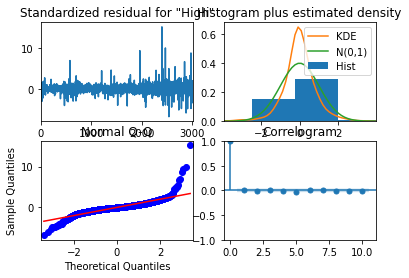

In [65]:
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error

model = sm.tsa.VARMAX(train_sample,order=(1,1),trend='c')
result = model.fit(maxiter=1000,disp=False)

print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))